In [2]:
import numpy as np; import datetime
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('ml-03-data-processing-songs-dataset.csv', thousands=',')
df.rename(columns={'Length (Duration)': 
                   'length', 'Loudness (dB)' : 'db', 
                   'Beats Per Minute (BPM)' : 'bpm', 
                   'Top Genre' : 'Genre'}, inplace=True)
df.head()

,Index,Title,Artist,Genre,Year,Month,bpm,Energy,Danceability,db,Liveness,Valence,length,Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,53.0,-14.0,11.0,68.0,201.0,94.0,3.0,71.0
1,2,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,50.0,-11.0,17.0,81.0,207.0,17.0,7.0,39.0
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,66.0,-9.0,7.0,52.0,341.0,2.0,17.0,69.0
3,4,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,43.0,-4.0,3.0,37.0,269.0,0.0,4.0,76.0
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,58.0,-5.0,10.0,87.0,256.0,1.0,3.0,59.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         1994 non-null   int64  
 1   Title         1991 non-null   object 
 2   Artist        1986 non-null   object 
 3   Genre         1986 non-null   object 
 4   Year          1987 non-null   float64
 5   Month         1994 non-null   object 
 6   bpm           1985 non-null   float64
 7   Energy        1986 non-null   float64
 8   Danceability  970 non-null    float64
 9   db            1987 non-null   float64
 10  Liveness      1986 non-null   float64
 11  Valence       960 non-null    float64
 12  length        1985 non-null   float64
 13  Acousticness  1986 non-null   float64
 14  Speechiness   1990 non-null   float64
 15  Popularity    1987 non-null   float64
dtypes: float64(11), int64(1), object(4)
memory usage: 249.4+ KB


In [5]:
df.shape

(1994, 16)

In [6]:
df.isna().sum()

Index              0
Title              3
Artist             8
Genre              8
Year               7
Month              0
bpm                9
Energy             8
Danceability    1024
db                 7
Liveness           8
Valence         1034
length             9
Acousticness       8
Speechiness        4
Popularity         7
dtype: int64

#### Drop Cols w/ 50% missing

In [7]:
df.drop(columns=['Index', 'Danceability', 'Valence'], inplace=True)
df.head()

,Title,Artist,Genre,Year,Month,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004.0,10,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0
1,Black Night,Deep Purple,album rock,2000.0,3,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0
2,Clint Eastwood,Gorillaz,alternative hip hop,2001.0,6,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0
3,The Pretender,Foo Fighters,alternative metal,2007.0,1,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002.0,8,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0


In [8]:
df.isnull().sum()

Title           3
Artist          8
Genre           8
Year            7
Month           0
bpm             9
Energy          8
db              7
Liveness        8
length          9
Acousticness    8
Speechiness     4
Popularity      7
dtype: int64

#### Drop row with 50% missing

In [9]:
df.shape

(1994, 13)

In [10]:
df.dropna(axis=0, thresh=7, inplace=True)

In [11]:
df.shape

(1986, 13)

In [12]:
df.describe()

,Year,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
count,1984.000000,1983.000000,1982.000000,1982.000000,1983.000000,1982.000000,1984.000000,1985.000000,1985.000000
mean,1959.468246,120.234493,59.644299,-9.016145,19.019667,262.616549,28.916835,4.991940,59.511839
std,250.835292,28.639923,22.172175,3.652323,16.750412,93.819708,29.028802,4.408105,14.366705
min,92.000000,15.000000,3.000000,-27.000000,2.000000,93.000000,0.000000,2.000000,11.000000
25%,1978.000000,99.000000,42.000000,-11.000000,9.000000,212.000000,3.000000,3.000000,49.000000
50%,1993.000000,119.000000,61.000000,-8.500000,12.000000,245.000000,18.000000,4.000000,62.000000
75%,2007.000000,136.000000,78.000000,-6.000000,23.000000,290.000000,50.000000,5.000000,71.000000
max,2019.000000,305.000000,100.000000,-2.000000,99.000000,1412.000000,99.000000,55.000000,100.000000


In [13]:
# sns.pairplot(df)

In [14]:
df.select_dtypes(include=np.number).columns.tolist()

['Year',
 'bpm',
 'Energy',
 'db',
 'Liveness',
 'length',
 'Acousticness',
 'Speechiness',
 'Popularity']

In [15]:
ss = StandardScaler()

zscore = ss.fit_transform(df[df.select_dtypes(include=np.number).columns.tolist()])

In [16]:
z_df = pd.DataFrame(zscore, columns=df.select_dtypes(include=np.number).columns.tolist())

In [17]:
z_df.sort_values(by='Liveness', ascending=False).head(30)

,Year,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
1255,0.093837,0.934788,1.595000,0.826024,4.776032,0.259962,-0.996394,1.136389,-1.428094
405,0.201505,1.877766,1.459661,-0.543313,4.776032,0.739727,-0.961937,0.455653,-1.567340
1369,0.105800,-0.008190,-1.247116,-3.281987,4.716317,-0.742212,-0.307249,2.724773,-1.288848
163,0.185554,0.341061,-1.247116,-2.186518,4.656602,0.195994,0.829839,0.682565,-1.288848
258,0.173591,1.039563,1.504774,1.647626,4.656602,-0.827504,0.244066,0.682565,0.033987
320,0.185554,-1.370269,-0.164405,-0.543313,4.656602,-0.411708,1.587898,0.001829,-0.383750
1096,0.073899,-1.021018,1.008532,0.552156,4.656602,0.579805,-0.651822,0.001829,-1.358471
1746,0.153652,-0.357441,1.188984,0.552156,4.656602,0.601128,-0.824108,0.001829,-0.174882
352,0.177579,0.341061,-0.480196,0.004422,4.596887,0.355915,0.760925,-0.451995,-1.497717
1679,0.141689,-1.265493,-2.104262,-1.364915,4.596887,0.100041,1.518984,-0.451995,-1.985078


In [18]:
df.iloc[1255]

Title           Gloria - Live
Artist                     U2
Genre              irish rock
Year                   1983.0
Month                       3
bpm                     147.0
Energy                   95.0
db                       -6.0
Liveness                 99.0
length                  287.0
Acousticness              0.0
Speechiness              10.0
Popularity               39.0
Name: 1258, dtype: object

#### Missing Vals

In [19]:
df['Genre'].mode()[0]

'album rock'

In [20]:
# Fill in the Genre with the mode
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

In [21]:
df._get_numeric_data()

,Year,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
0,2004.0,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0
1,2000.0,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0
2,2001.0,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0
3,2007.0,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0
4,2002.0,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0
...,...,...,...,...,...,...,...,...,...
1989,1958.0,94.0,21.0,-12.0,11.0,128.0,84.0,7.0,63.0
1990,1958.0,175.0,76.0,-8.0,76.0,136.0,73.0,6.0,69.0
1991,1959.0,168.0,80.0,-9.0,31.0,162.0,74.0,7.0,74.0
1992,1959.0,174.0,26.0,-13.0,7.0,324.0,54.0,4.0,65.0


In [22]:
impute_mean = SimpleImputer(strategy='mean')

new_df = pd.DataFrame(impute_mean.fit_transform(df._get_numeric_data()), columns = df._get_numeric_data().columns)


In [23]:
print(new_df.dtypes)
new_df.isnull().sum()

Year            float64
bpm             float64
Energy          float64
db              float64
Liveness        float64
length          float64
Acousticness    float64
Speechiness     float64
Popularity      float64
dtype: object


Year            0
bpm             0
Energy          0
db              0
Liveness        0
length          0
Acousticness    0
Speechiness     0
Popularity      0
dtype: int64

In [24]:
new_df.head()

,Year,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
0,2004.0,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0
1,2000.0,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0
2,2001.0,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0
3,2007.0,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0
4,2002.0,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0


In [25]:
new_df.shape

(1986, 9)

#### Part 4 -- Change 92 to 1992
The verify that the values have changed to `1992`

In [26]:
df.loc[df['Year'] == 92., ['Year']] = 1992.
df['Year'].unique()

array([2004., 2000., 2001., 2007., 2002., 2006., 2003., 2005., 2009.,
       2008., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 1970., 1971., 1972.,   nan, 1973., 1974., 1975.,
       1976., 1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984.,
       1985., 1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993.,
       1994., 1995., 1996., 1997., 1998., 1999., 1960., 1961., 1962.,
       1963., 1964., 1965., 1966., 1967., 1968., 1969., 1956., 1958.,
       1959.])

In [27]:
df.dtypes

Title            object
Artist           object
Genre            object
Year            float64
Month            object
bpm             float64
Energy          float64
db              float64
Liveness        float64
length          float64
Acousticness    float64
Speechiness     float64
Popularity      float64
dtype: object

In [28]:
df.shape

(1986, 13)

#### Part 5
Combine the date-related columns into one column with the Pandas `to_datetime()` method, then use that column to create a numeric `Age` column (in years). Calculate `Age` based on today's date; it doesn't have to be a whole number. Once you've created the Age column, remove the other date-related columns, including the one you created with Pandas.


In [29]:
# Fill the year nan's with the mode of year
df['Year'].fillna(value=(df['Year'].mode()), inplace=True)

# Create a dictionary to map the month values
col_dict = {'Jan' : '1',
            'Dec' : '12',
            'Sep' : '9',
            'Apr' : '4',
            'Jun' : '6',
            'May' : '5'}

# Use .replace() to assign the new values
df['Month'].replace(col_dict, inplace=True)

# Change month to an integer
df['Month'] = df['Month'].astype(int)
df['Month'].unique()

array([10,  3,  6,  1,  8,  2,  9, 12, 11,  4,  7,  5])

In [30]:
# Turn Year and Month into a datetime object
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))

# Create a variable for today
today = datetime.datetime.today()
df['age'] = df['Date'].apply(lambda x: (today - x).days // 365)

# Drop all of these cols
df.drop(columns=['Year', 'Month', 'Date'], inplace=True)

df.head()

,Title,Artist,Genre,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity,age
0,Sunrise,Norah Jones,adult standards,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0,17.0
1,Black Night,Deep Purple,album rock,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0,22.0
2,Clint Eastwood,Gorillaz,alternative hip hop,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0,20.0
3,The Pretender,Foo Fighters,alternative metal,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0,15.0
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0,19.0


In [31]:
df.shape

(1986, 12)

#### Part 6 Dummies

In [32]:
df.dtypes

Title            object
Artist           object
Genre            object
bpm             float64
Energy          float64
db              float64
Liveness        float64
length          float64
Acousticness    float64
Speechiness     float64
Popularity      float64
age             float64
dtype: object

In [33]:
df['Genre'].nunique()

149

In [34]:
df = pd.get_dummies(df, columns=['Genre'], drop_first=True).drop(columns=['bpm', 'db', 'Energy', 'Liveness', 'length', 'Acousticness', 'Speechiness', 'Popularity']).copy()

In [35]:
df.head()

,Title,Artist,age,Genre_acoustic pop,Genre_adult standards,Genre_afropop,Genre_alaska indie,Genre_album rock,Genre_alternative country,Genre_alternative dance,...,Genre_reggae,Genre_reggae fusion,Genre_rock-and-roll,Genre_scottish singer-songwriter,Genre_soft rock,Genre_stomp and holler,Genre_streektaal,Genre_trance,Genre_uk pop,Genre_yacht rock
0,Sunrise,Norah Jones,17.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Black Night,Deep Purple,22.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Clint Eastwood,Gorillaz,20.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Pretender,Foo Fighters,15.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Waitin' On A Sunny Day,Bruce Springsteen,19.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Combine to one DF

In [36]:
df.reset_index(inplace=True)
new_df.reset_index(inplace=True)

In [37]:
final_df = pd.concat([df, new_df[new_df.columns]], axis=1)
final_df.drop(columns=['Year', 'index'], inplace=True)

final_df.head()

,Title,Artist,age,Genre_acoustic pop,Genre_adult standards,Genre_afropop,Genre_alaska indie,Genre_album rock,Genre_alternative country,Genre_alternative dance,...,Genre_uk pop,Genre_yacht rock,bpm,Energy,db,Liveness,length,Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,17.0,0,1,0,0,0,0,0,...,0,0,157.0,30.0,-14.0,11.0,201.0,94.0,3.0,71.0
1,Black Night,Deep Purple,22.0,0,0,0,0,1,0,0,...,0,0,135.0,79.0,-11.0,17.0,207.0,17.0,7.0,39.0
2,Clint Eastwood,Gorillaz,20.0,0,0,0,0,0,0,0,...,0,0,168.0,69.0,-9.0,7.0,341.0,2.0,17.0,69.0
3,The Pretender,Foo Fighters,15.0,0,0,0,0,0,0,0,...,0,0,173.0,96.0,-4.0,3.0,269.0,0.0,4.0,76.0
4,Waitin' On A Sunny Day,Bruce Springsteen,19.0,0,0,0,0,0,0,0,...,0,0,106.0,82.0,-5.0,10.0,256.0,1.0,3.0,59.0


In [38]:
final_df.shape

(1986, 159)

## Model Building

In [39]:
cars = pd.read_csv('Cars93.csv')

cars.drop(columns='Unnamed: 0', inplace=True)
cars.dropna(inplace=True)

cars.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [40]:
cars.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [41]:
# Step 2

y = cars['MPG.highway'] # This is our target variable
X = cars.drop(columns='MPG.highway').copy() # This is my matrix of independent variables

In [42]:
X.head(3)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,AirBags,DriveTrain,Cylinders,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,None,Front,4,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,Driver & Passenger,Front,6,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,Driver only,Front,6,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


In [43]:
print(X.shape)
print(y.shape)

(82, 26)
(82,)


In [44]:
# cate_cols

In [45]:
cate_cols = X.select_dtypes(include=['object']).columns.tolist()

X = pd.get_dummies(X, columns=cate_cols, drop_first=True)

In [46]:
X.head()

,Min.Price,Price,Max.Price,MPG.city,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,...,Make_Subaru Loyale,Make_Suzuki Swift,Make_Toyota Camry,Make_Toyota Celica,Make_Toyota Tercel,Make_Volkswagen Corrado,Make_Volkswagen Fox,Make_Volkswagen Passat,Make_Volvo 240,Make_Volvo 850
0,12.9,15.9,18.8,25,1.8,140,6300,2890,13.2,5,...,0,0,0,0,0,0,0,0,0,0
1,29.2,33.9,38.7,18,3.2,200,5500,2335,18.0,5,...,0,0,0,0,0,0,0,0,0,0
2,25.9,29.1,32.3,20,2.8,172,5500,2280,16.9,5,...,0,0,0,0,0,0,0,0,0,0
3,30.8,37.7,44.6,19,2.8,172,5500,2535,21.1,6,...,0,0,0,0,0,0,0,0,0,0
4,23.7,30.0,36.2,22,3.5,208,5700,2545,21.1,4,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X.shape

(82, 224)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61, 224)
(21, 224)
(61,)
(21,)


In [50]:
lr = LinearRegression()

lr.fit(X_train, y_train) # this is the model learning the training data

preds = lr.predict(X_test) # y-hat

resids = y_test - preds

In [51]:
lr.score(X_test, y_test)

0.9286796685088757

H:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


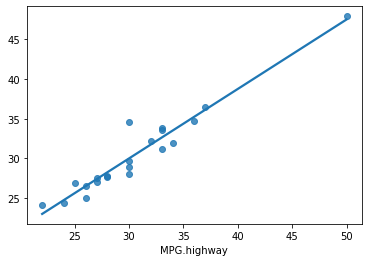

In [52]:
sns.regplot(y_test, preds, fit_reg=True, ci=None);


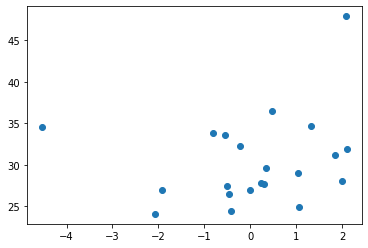

In [53]:
plt.scatter(resids, preds);

In [54]:
print(lr.intercept_)
lr.coef_

-2.395655219098092


array([ 2.61225641e-02, -2.38856448e-02, -1.20821138e-02,  8.36708652e-01,
       -1.43731825e-01,  9.75260426e-03,  2.14862691e-04, -7.60877240e-04,
       -4.28805544e-02, -5.26186979e-01,  2.66035263e-02,  1.44884723e-01,
        4.27543887e-02,  1.30786432e-02, -1.53900890e-01,  4.08497568e-01,
       -2.83877881e-03,  1.46479742e-01,  5.93681160e-01,  2.21718053e-01,
        5.44452271e-01,  8.84555844e-01,  2.45907504e-01, -4.78624927e-01,
       -5.93363315e-01, -4.25093473e-01, -7.19648900e-01,  1.37383913e-01,
       -1.98275769e-01,  1.11317444e-01, -1.09437720e-05, -2.22424104e-01,
       -1.44852342e-01,  3.64940288e-01,  4.64806126e-01, -1.06125576e+00,
       -5.97106101e-01, -7.64872919e-01, -1.04127427e-02,  1.30630661e-06,
        6.06034589e-01, -5.06625595e-01,  1.03476729e+00, -4.21746751e-02,
        3.64819027e-01, -2.05034501e-01,  8.71346127e-01,  3.26130519e-02,
        8.60076475e-01, -1.26720928e-01, -3.95279835e-01,  9.34657623e-02,
        5.93646672e-01,  

In [55]:
import scipy.stats

slope, intercept, r, p, stderr = scipy.stats.linregress(X,y)

# Display factors
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

# Add the slope line
ax.plot(X, intercept + slope * X, label=line, color=lineColor)

# Set up the legend
ax.legend(facecolor='white')

# Show the plot
plt.show()


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 224 and the array at index 1 has size 82

## Kmeans

In [56]:
data = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

data['Comments'] = data['Comments'].isna().astype(int)

data.dropna(inplace=True)

data.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,1
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,1
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,1
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,1
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,0


In [57]:
X = data._get_numeric_data()

X.dropna(inplace=True)

ss = StandardScaler()

X = ss.fit_transform(X)


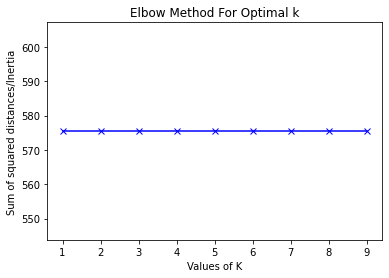

In [58]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K:
    km = KMeans(n_clusters=5, random_state=0)
    km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()




In [59]:
km = KMeans(n_clusters=3, random_state=0)
km.fit(X)


KMeans(n_clusters=3, random_state=0)

In [60]:
km.cluster_centers_

array([[ 0.71404073,  0.67820262, -0.43076684, -0.57447092,  1.13586696,
         1.42070425,  0.21821789],
       [ 0.63605964, -1.07608419,  1.13586302,  1.06820099, -0.88584784,
        -0.62672598,  0.21821789],
       [-0.98610775,  0.60463966, -0.79900583, -0.65590378,  0.17205575,
        -0.22625752, -0.323225  ]])

In [61]:
km.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [62]:
data['cluster'] = km.labels_

centroids = data.groupby(by='cluster').mean()

data.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,cluster
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,1,2
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,1,2
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,1,2
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,1,2
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,0,2


In [63]:
centroids

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
cluster,,,,,,,
0,47.930667,18.445333,195.306667,3754.000000,9.359169,-24.573907,1.000000
1,47.506557,14.979508,217.147541,5074.590164,8.245338,-26.185298,1.000000
2,38.684211,18.300000,190.172932,3688.533835,8.828173,-25.870117,0.887218


In [64]:
for i in data.columns[3:8]:
    print(i)

Culmen Length (mm)
Culmen Depth (mm)
Flipper Length (mm)
Body Mass (g)
Delta 15 N (o/oo)


In [65]:
data

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,cluster
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,1,2
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,1,2
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,1,2
5,Anvers,"Adult, 1 Egg Stage",N3A2,39.3,20.6,190.0,3650.0,8.66496,-25.29805,1,2
6,Anvers,"Adult, 1 Egg Stage",N4A1,38.9,17.8,181.0,3625.0,9.18718,-25.21799,0,2
...,...,...,...,...,...,...,...,...,...,...,...
338,Anvers,"Adult, 1 Egg Stage",N38A1,47.2,13.7,214.0,4925.0,7.99184,-26.20538,1,1
340,Anvers,"Adult, 1 Egg Stage",N39A1,46.8,14.3,215.0,4850.0,8.41151,-26.13832,1,1
341,Anvers,"Adult, 1 Egg Stage",N39A2,50.4,15.7,222.0,5750.0,8.30166,-26.04117,1,1
342,Anvers,"Adult, 1 Egg Stage",N43A1,45.2,14.8,212.0,5200.0,8.24246,-26.11969,1,1


<Figure size 504x504 with 0 Axes>

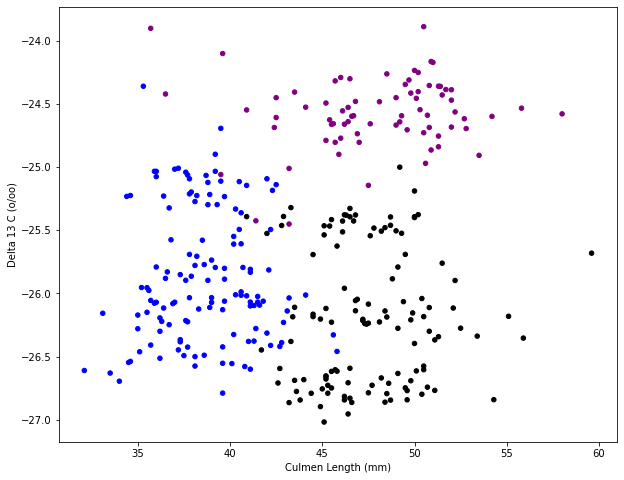

<Figure size 504x504 with 0 Axes>

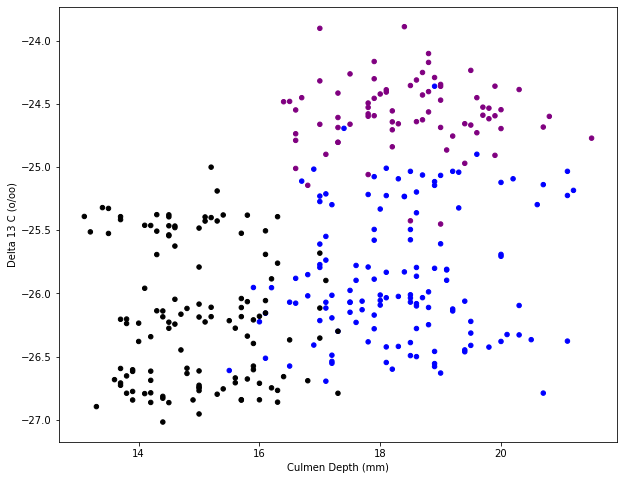

<Figure size 504x504 with 0 Axes>

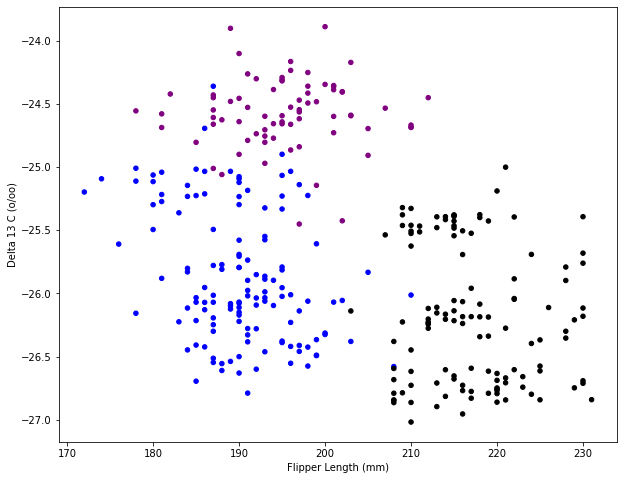

<Figure size 504x504 with 0 Axes>

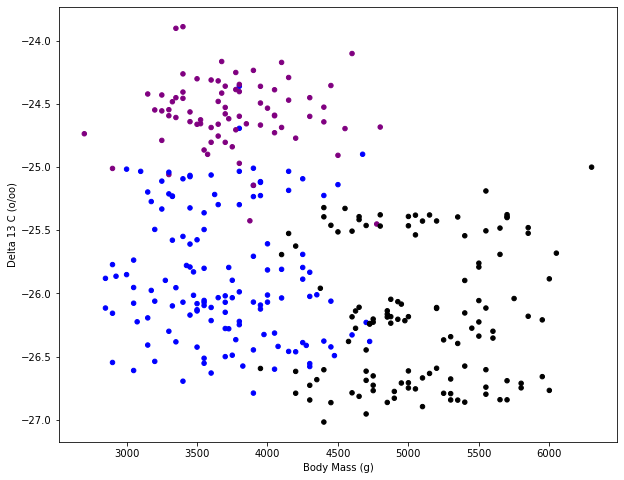

<Figure size 504x504 with 0 Axes>

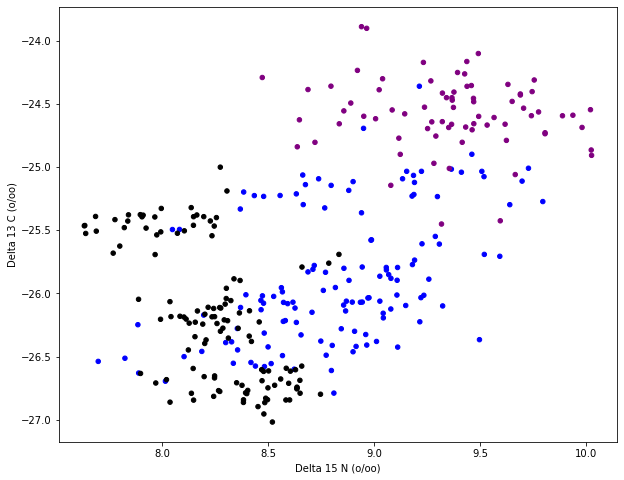

In [66]:
for i in data.columns[3:8]:


    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["purple", "black", "blue", 'orange']
    data['color'] = data['cluster'].map(lambda p: colors[p]);

    ax = data.plot(    
        kind="scatter", 
        x=i, y="Delta 13 C (o/oo)",
        figsize=(10,8),
        c = data['color']
    );

    # centroids.plot(
    #     kind="scatter", 
    #     x=i, y="Individual ID", 
    #     marker="^", c=["r", "g", "b"], s=550,
    #     ax=ax
    # );

Silhouette Score calculated as:

$$s_i = \frac{b_i - a_i}{max\{a_i, b_i\}}$$

where:

* $a_i$ = Average distance from point $x_i$ to all other points **in the same cluster**.
* $b_i$ = Smallest mean distance from point $x_i$ to all points **in any other cluster**.

And the resulting silhouette score is the average of all the scores:

* -1 = Bad
* 0 = Meh
* 1 = Good

The silhouette score evaluates the viability of your clusters. It is a way to quantify the "cohesion" of local points to their clusters and the separation to other clusters.

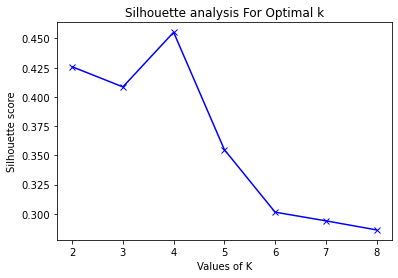

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
plt.plot(range_n_clusters, silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
scores = []

for k in range(2, 50):
    
    #Clusters
    km = KMeans(n_clusters = k, random_state = 0)
    km.fit(X)
    
    # Get my silhouette scores
    sil = silhouette_score(X, km.labels_)
    
    #Append these scores to my scores list
    scores.append((k, sil))
    
scores_df = pd.DataFrame(scores, columns=['k', 'silhouette_score'])

scores_df

,k,silhouette_score
0,2,0.425793
1,3,0.408543
2,4,0.455986
3,5,0.356130
4,6,0.299925
5,7,0.293175
6,8,0.296789
7,9,0.273955
8,10,0.268854
9,11,0.263216
